### Dataset
Lets Load the dataset. We shall use the following datasets:
Features are in: "sido0_train.mat"
Labels are in: "sido0_train.targets"

In [37]:
from scipy.io import loadmat
import numpy as np

X = loadmat(r"/Users/rkiyer/teaching/CS7301/jupyter/data/sido0_matlab/sido0_train.mat")
y = np.loadtxt(r"/Users/rkiyer/teaching/CS7301/jupyter/data/sido0_matlab/sido0_train.targets")

# Statistics of the Dense Format of X
X = X['X'].todense()
print(X.shape)

(12678, 4932)


### Logistic Regression Definition
Lets use the Logistic Regression definition we previously used


In [38]:
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    n = X.shape[1]
    Xw = np.dot(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(np.multiply(w,w))
    gMul = 1/(1 + np.exp(yXw))
    ymul = -1*np.multiply(yT, gMul)
    g =  np.dot(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = g.reshape(-1,1)
    return [f, g]

### Basic Gradient Descent Again
Lets invoke the basic GD again and use the optimal (tuned) Learning rate: alpha = 1e-5

In [39]:
from numpy import linalg as LA

def gd(funObj,w,maxEvals,alpha,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    while(1):
        [f,g] = funObj(w,X,y,lam)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        w = w - alpha*g
        funEvals = funEvals+1
        if (optCond < 1e-2):
            break
        if (funEvals > maxEvals):
            break
        funVals.append(f)
    return funVals

[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
funV1 = gd(LogisticLoss,w,250,1e-5,X,y,1,1,10)

FunEvals: 10, alpha = 1e-05, Function Value = 1213.4743201114695Opt Cond: 114.68153126393145
FunEvals: 20, alpha = 1e-05, Function Value = 1131.4844387092353Opt Cond: 90.04707758512986
FunEvals: 30, alpha = 1e-05, Function Value = 1083.7563505555165Opt Cond: 72.60196962998849
FunEvals: 40, alpha = 1e-05, Function Value = 1050.7099921961803Opt Cond: 60.832705300734666
FunEvals: 50, alpha = 1e-05, Function Value = 1025.6543231061964Opt Cond: 52.22614904403128
FunEvals: 60, alpha = 1e-05, Function Value = 1005.5325735481615Opt Cond: 45.61185402029006
FunEvals: 70, alpha = 1e-05, Function Value = 988.6782517600735Opt Cond: 40.356986934455556
FunEvals: 80, alpha = 1e-05, Function Value = 974.0992190976251Opt Cond: 36.0796539374524
FunEvals: 90, alpha = 1e-05, Function Value = 961.1721323263499Opt Cond: 34.215600758836075
FunEvals: 100, alpha = 1e-05, Function Value = 949.4884325878157Opt Cond: 32.747689575741774
FunEvals: 110, alpha = 1e-05, Function Value = 938.7702766898448Opt Cond: 31.48

### Gradient Descent with Line Search
#### Version 1: Armijo Backtracking Line Search
Lets now define the most basic version of Gradient Descent and tune the learning rate!

In [40]:
from numpy import linalg as LA

def gdArmijoV1(funObj,w,maxEvals,alpha,gamma,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    funVals.append(f)
    numBackTrack = 0
    while(1):
        wp = w - alpha*g
        [fp,gp] = funObj(wp,X,y,lam)
        funEvals = funEvals+1
        backtrack = 0
        while fp > f - gamma*alpha*np.dot(g.T, g):
            alpha = alpha/2
            wp = w - alpha*g
            [fp,gp] = funObj(wp,X,y,lam)
            funVals.append(f)
            funEvals = funEvals+1
            numBackTrack = numBackTrack + 1
            backtrack = 1
            #print(f,fp)
        w = wp
        f = fp
        g = gp
        if (backtrack == 0):
            funVals.append(f)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        if (optCond < 1e-2):
            break
        if (funEvals >= maxEvals):
            break
    return (funVals,numBackTrack)

In [41]:
[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
(funV2,numBackTrack) = gdArmijoV1(LogisticLoss,w,250,1,1e-4,X,y,1,1,10)
print(len(funV2))
print("Number of Backtrackings = " + str(numBackTrack))

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


FunEvals: 20, alpha = 1.52587890625e-05, Function Value = 4498.650573294827Opt Cond: 451.459364054303
FunEvals: 30, alpha = 1.52587890625e-05, Function Value = 1148.0405691540864Opt Cond: 75.82390057650869
FunEvals: 40, alpha = 1.52587890625e-05, Function Value = 1065.4436384096484Opt Cond: 59.740701681862525
FunEvals: 50, alpha = 1.52587890625e-05, Function Value = 1021.1487768099613Opt Cond: 48.65527879568036
FunEvals: 60, alpha = 1.52587890625e-05, Function Value = 992.227687124363Opt Cond: 41.45165833308758
FunEvals: 70, alpha = 1.52587890625e-05, Function Value = 970.1642298357134Opt Cond: 36.784922860594925
FunEvals: 80, alpha = 1.52587890625e-05, Function Value = 951.7606903479165Opt Cond: 33.6323302672203
FunEvals: 90, alpha = 1.52587890625e-05, Function Value = 935.6586493742099Opt Cond: 31.37592503799789
FunEvals: 100, alpha = 1.52587890625e-05, Function Value = 921.1700398667938Opt Cond: 29.66811419106363
FunEvals: 110, alpha = 1.52587890625e-05, Function Value = 907.8922769

#### So we already see an improvement vs the fixed learning rate!

Next, we add a simple fix to reset the alpha in every iteration!

In [42]:
from numpy import linalg as LA

def gdArmijoV2(funObj,w,maxEvals,alpha,gamma,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    funVals.append(f)
    numBackTrack = 0
    while(1):
        wp = w - alpha*g
        [fp,gp] = funObj(wp,X,y,lam)
        funVals.append(f)
        funEvals = funEvals+1
        while fp > f - gamma*alpha*np.dot(g.T, g):
            alpha = alpha/2
            wp = w - alpha*g
            [fp,gp] = funObj(wp,X,y,lam)
            funEvals = funEvals+1
            numBackTrack = numBackTrack + 1
            funVals.append(f)
            #print("backtracking...")
        if funEvals > 1:
            alpha = 1
        w = wp
        f = fp
        g = gp
        #if (backtrack == 0):
        #    funVals.append(f)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        if (optCond < 1e-2):
            break
        if (funEvals >= maxEvals):
            break
    return (funVals,numBackTrack)

In [43]:
[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
(funV3,numBackTrack) = gdArmijoV2(LogisticLoss,w,250,1,1e-4,X,y,1,1,1)
print(len(funV3))
print("Number of Backtrackings = " + str(numBackTrack))

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


FunEvals: 18, alpha = 1, Function Value = 6287.967565628375Opt Cond: 452.00969291126097
FunEvals: 32, alpha = 1, Function Value = 3151.0641101762303Opt Cond: 1089.2999211897193
FunEvals: 49, alpha = 1, Function Value = 1388.5705323782008Opt Cond: 274.4850653428761
FunEvals: 65, alpha = 1, Function Value = 1367.6205810945441Opt Cond: 392.85469745505264
FunEvals: 82, alpha = 1, Function Value = 1190.9825895365623Opt Cond: 163.61485732031667
FunEvals: 99, alpha = 1, Function Value = 1142.2255098638402Opt Cond: 71.10602946643556
FunEvals: 113, alpha = 1, Function Value = 1105.3256169661377Opt Cond: 146.86817766975645
FunEvals: 130, alpha = 1, Function Value = 1063.8543989762459Opt Cond: 58.1590401075362
FunEvals: 144, alpha = 1, Function Value = 1048.1578857602194Opt Cond: 120.60703888710778
FunEvals: 161, alpha = 1, Function Value = 1021.7524003264253Opt Cond: 51.568587082251206
FunEvals: 175, alpha = 1, Function Value = 1016.5578547803899Opt Cond: 108.16851408981083
FunEvals: 192, alpha 

#### Each iteration makes more progress but slower convergence!

Next, we try the Hermite Polynomial Interpolation
- Step sizes ignore information collected during Line Search
- Reduce the number of evals per iteration using Hermite polynomial interpolation
- I.e. minimize the quadratic passing through f(w), f'(w) and f(w - alpha*g)

In [44]:
from numpy import linalg as LA

def gdArmijoV3(funObj,w,maxEvals,alpha,gamma,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    numBackTrack = 0
    while(1):
        wp = w - alpha*g
        [fp,gp] = funObj(wp,X,y,lam)
        funEvals = funEvals+1
        funVals.append(f)
        while fp > f - gamma*alpha*np.dot(g.T, g):
            alpha = alpha*alpha*np.dot(g.T, g)[0,0]/(2*(fp + np.dot(g.T, g)[0,0]*alpha - f))
            wp = w - alpha*g
            [fp,gp] = funObj(wp,X,y,lam)
            funEvals = funEvals+1
            funVals.append(f)
            numBackTrack = numBackTrack + 1
        w = wp
        f = fp
        g = gp
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        if (optCond < 1e-2):
            break
        if (funEvals >= maxEvals):
            break
        if funEvals > 1:
            alpha = 1
    return (funVals,numBackTrack)

In [45]:
[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
(funV4,numBackTrack) = gdArmijoV3(LogisticLoss,w,250,1,1e-4,X,y,1,1,1)
print(len(funV4))
print("Number of Backtrackings = " + str(numBackTrack))

/Library/Python/3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


FunEvals: 16, alpha = 1, Function Value = 5057.114213961772Opt Cond: 451.35289867033515
FunEvals: 20, alpha = 1, Function Value = 3039.131010554021Opt Cond: 443.46281971391636
FunEvals: 24, alpha = 1, Function Value = 1377.6873116232064Opt Cond: 243.32542483926662
FunEvals: 28, alpha = 1, Function Value = 1222.5966295180156Opt Cond: 133.99507294768762
FunEvals: 32, alpha = 1, Function Value = 1193.6516258748236Opt Cond: 108.30939762697118
FunEvals: 38, alpha = 1, Function Value = 1149.9576036940578Opt Cond: 152.49168597437603
FunEvals: 42, alpha = 1, Function Value = 1107.5362734651917Opt Cond: 75.32862810646213
FunEvals: 45, alpha = 1, Function Value = 1095.6503202240062Opt Cond: 136.12451886892705
FunEvals: 51, alpha = 1, Function Value = 1080.898581592045Opt Cond: 78.44790972536546
FunEvals: 54, alpha = 1, Function Value = 1074.0076588549186Opt Cond: 114.55974204164804
FunEvals: 60, alpha = 1, Function Value = 1063.391848352062Opt Cond: 66.36184028823594
FunEvals: 63, alpha = 1, Fun

#### gdArmijoV3 is Much better!

One last fix: Better Initialization of alpha!


In [46]:
from numpy import linalg as LA

def gdArmijoV4(funObj,w,maxEvals,alpha,gamma,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    f_old = f
    g_old = g
    funVals.append(f)
    alpha = 1/LA.norm(g)
    numBackTrack = 0
    while(1):
        wp = w - alpha*g
        [fp,gp] = funObj(wp,X,y,lam)
        funVals.append(f)
        funEvals = funEvals+1
        backtrack = 0
        while fp > f - gamma*alpha*np.dot(g.T, g):
            alpha = alpha*alpha*np.dot(g.T, g)[0,0]/(2*(fp + np.dot(g.T, g)[0,0]*alpha - f))
            wp = w - alpha*g
            [fp,gp] = funObj(wp,X,y,lam)
            funVals.append(f)
            funEvals = funEvals+1
            numBackTrack = numBackTrack + 1
        if funEvals > 2:
            alpha = min(1,2*(f_old - f)/np.dot(g.T, g)[0,0])
        f_old = f
        g_old = g
        w = wp
        f = fp
        g = gp
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print("FunEvals: " + str(funEvals) + ", alpha = " + str(alpha) + ", Function Value = " + str(f) + "Opt Cond: " + str(optCond))
        if (optCond < 1e-2):
            break
        if (funEvals >= maxEvals):
            break
    return (funVals,numBackTrack)

In [47]:
[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
(funV5,numBackTrack) = gdArmijoV4(LogisticLoss,w,250,1,1e-4,X,y,1,1,10)
print(len(funV5))
print("Number of Backtrackings = " + str(numBackTrack))

FunEvals: 20, alpha = 4.1796056076066775e-05, Function Value = 1012.4951823907003Opt Cond: 95.53384664247373
FunEvals: 30, alpha = 3.997469461451199e-05, Function Value = 953.5753177548778Opt Cond: 35.655121235018115
FunEvals: 40, alpha = 0.00012388804702371698, Function Value = 885.1699025757175Opt Cond: 31.335650768554615
FunEvals: 50, alpha = 1.3144239424878223e-05, Function Value = 868.4387633860271Opt Cond: 22.72480197211717
FunEvals: 60, alpha = 3.19951286344067e-05, Function Value = 846.6514541812807Opt Cond: 38.97806992194706
FunEvals: 70, alpha = 6.404017174599795e-05, Function Value = 830.1929117099367Opt Cond: 42.25847013698607
FunEvals: 80, alpha = 0.00011081246239613855, Function Value = 812.8209357043669Opt Cond: 24.121207738723843
FunEvals: 90, alpha = 3.612908378647803e-05, Function Value = 797.2790559279035Opt Cond: 24.85602397608963
FunEvals: 100, alpha = 6.343884114915358e-05, Function Value = 785.5404258802879Opt Cond: 19.27475140750184
FunEvals: 110, alpha = 0.0001

In [48]:
print(len(funV1))
print(len(funV2))
print(len(funV3))
print(len(funV4))
print(len(funV5))

249
249
254
250
250


Text(0, 0.5, 'Function Value')

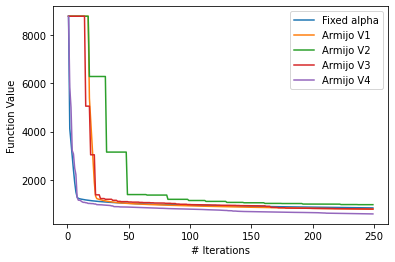

In [49]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV1)+1), funV1, label='Fixed alpha')
plt.plot(range(1,len(funV1)+1), funV2, label='Armijo V1')
plt.plot(range(1,len(funV1)+1), funV3[1:len(funV1)+1], label='Armijo V2')
plt.plot(range(1,len(funV1)+1), funV4[1:len(funV1)+1], label='Armijo V3')
plt.plot(range(1,len(funV1)+1), funV5[1:len(funV1)+1], label='Armijo V4')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")

Text(0, 0.5, 'Function Value')

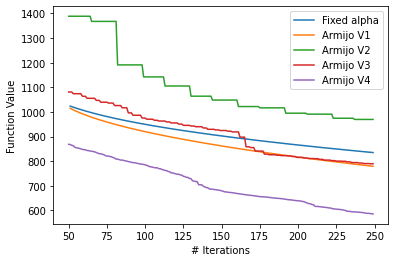

In [54]:
from matplotlib import pyplot as plt
plt.plot(range(51,len(funV1)+1), funV1[50:len(funV1)+1], label='Fixed alpha')
plt.plot(range(51,len(funV1)+1), funV2[50:len(funV1)+1], label='Armijo V1')
plt.plot(range(50,len(funV1)+1), funV3[50:len(funV1)+1], label='Armijo V2')
plt.plot(range(50,len(funV1)+1), funV4[50:len(funV1)+1], label='Armijo V3')
plt.plot(range(50,len(funV1)+1), funV5[50:len(funV1)+1], label='Armijo V4')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")